In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import yfinance as yf
import heapq
import talib as ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_daily_ohlcv(tickers, years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick=yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=False,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
# RTime Series Rank
def ts_rank(qty,window=10):
    n,qty=getleneq(qty)[1]
    out=[]
    for i in range(n):
        out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
    return out

# Cross Sectional Rank, also called 'Rank' by Kakushadze
def cs_rank(qty):
    """
    Input: 2-d array of qty
    Output: 2-d array of ranks
    """
    n,qty=getleneq(qty)
    return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
tickers_ltp= ['TSLA', 'ROKU', 'MRNA', 'PDD', 'NVDA', 'ETSY', 'FB', 'SQ', 'BA',
       'DIS', 'PLUG', 'IWM', 'XBI', 'MSFT', 'QQQ', 'AAPL', 'BABA', 'FSLY',
       'PYPL', 'SPY', 'TSM', 'CHWY', 'JPM', 'AMAT', 'XOP', 'SNAP', 'QCOM',
       'NET', 'IBB', 'MU', 'AXP', 'CVX', 'V', 'BRK.B', 'UBER', 'ABBV',
       'JD', 'TWTR', 'LYFT', 'KSS', 'CZR', 'MPC', 'XLK', 'SBUX', 'COF',
       'VLO', 'JNJ', 'MA', 'WDC', 'IBM']

In [14]:
stock=get_daily_ohlcv(tickers_ltp)

- BRK.B: No data found, symbol may be delisted


In [15]:
type(stock)

list

In [16]:
def getting_close(data):
    for i in range(len(data)):
        cl=data[i]['Close']
    return cl

In [17]:
Close = getting_close(stock)   
Close

0       115.759789
1       116.281799
2       116.845268
3       117.781616
4       118.444511
           ...    
1002    143.070007
1003    143.179993
1004    143.589996
1005    142.419998
1006    140.360001
Name: Close, Length: 1007, dtype: float64

In [18]:
def getting_open(data):
    for i in range(len(data)):
        op=data[i]['Open']
    return op

In [19]:
Open = getting_open(stock)
Open

0       116.729286
1       115.668608
2       116.538679
3       116.588385
4       118.079912
           ...    
1002    142.259995
1003    142.639999
1004    143.229996
1005    143.000000
1006    141.669998
Name: Open, Length: 1007, dtype: float64

In [20]:
def getting_high(data):
    for i in range(len(data)):
        hi=data[i]['High']
    return hi

In [21]:
High = getting_high(stock)
High

0       116.961301
1       116.356373
2       116.961276
3       118.535673
4       119.057690
           ...    
1002    143.149994
1003    143.580002
1004    143.740005
1005    143.160004
1006    141.914993
Name: High, Length: 1007, dtype: float64

In [22]:
def getting_low(data):
    for i in range(len(data)):
        lo=data[i]['Low']
    return lo

In [23]:
Low = getting_low(stock)
Low

0       115.660357
1       115.287445
2       116.323239
3       116.571809
4       117.872754
           ...    
1002    142.080002
1003    142.440002
1004    142.229996
1005    141.089996
1006    140.350006
Name: Low, Length: 1007, dtype: float64

In [24]:
def getting_volume(data):
    for i in range(len(data)):
        vo=data[i]['Volume']
        return vo

In [25]:
Volume = getting_volume(stock)
Volume

0       27041000
1       32477000
2       21610000
3       24772500
4       22923500
          ...   
1002    17459100
1003    16698900
1004    22677400
1005    23431200
1006    15661076
Name: Volume, Length: 1007, dtype: int64

In [26]:
#ADX - Average Directional Movement Index
#real = ADX(high, low, close, timeperiod=14)
def mi01(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            out=ta.ADX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=10)
            ou=np.nan_to_num(out, 0)
            mi.append(np.asarray(ou))
    return getleneq(mi)[1]

In [27]:
mi01(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 23.01152244,
        23.73891392, 22.47437092],
       [ 0.        ,  0.        ,  0.        , ..., 17.11433755,
        17.55706252, 18.25063099],
       [ 0.        ,  0.        ,  0.        , ..., 14.41589776,
        13.25347042, 12.8690607 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 28.71822081,
        30.18802871, 30.98226822],
       [ 0.        ,  0.        ,  0.        , ..., 21.34008955,
        23.8852912 , 25.7514584 ],
       [ 0.        ,  0.        ,  0.        , ..., 29.43191917,
        27.7729552 , 25.13180876]])

In [28]:
len(mi01(stock))

41

In [29]:
len(idlogrets(stock))

41

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


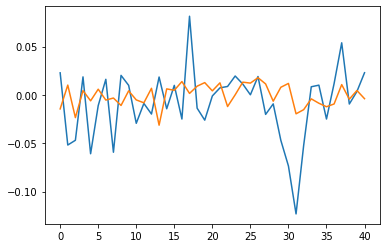

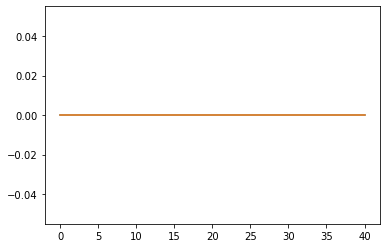

Wall time: 2min 48s


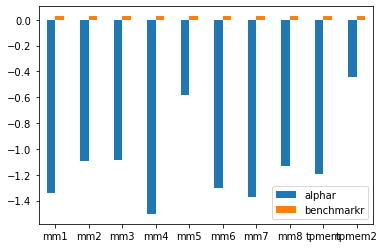

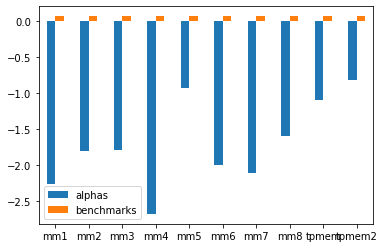

In [30]:
%%time
sig=get_signalact2(mi01(stock), idlogrets(stock), delay=1)

In [31]:
#ADXR - Average Directional Movement Index Rating
#real = ADXR(high, low, close, timeperiod=14)
def mi02(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.ADXR(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            b=np.nan_to_num(a, 0)
            mi.append(np.asarray(b))
    return getleneq(mi)[1]
        
mi02(stock)        

array([[ 0.        ,  0.        ,  0.        , ..., 15.17827238,
        15.14338675, 14.89272262],
       [ 0.        ,  0.        ,  0.        , ..., 20.40914917,
        19.62409358, 18.90949858],
       [ 0.        ,  0.        ,  0.        , ..., 14.84811298,
        13.84789122, 13.94362693],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 17.69024375,
        18.26960696, 18.36049977],
       [ 0.        ,  0.        ,  0.        , ..., 20.43513776,
        21.02284204, 21.41734831],
       [ 0.        ,  0.        ,  0.        , ..., 21.17517149,
        20.44235378, 19.26887048]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


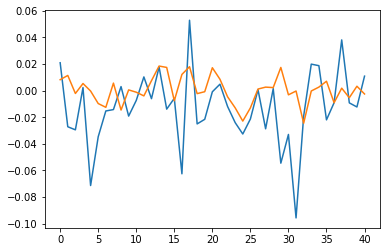

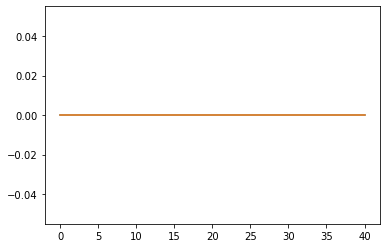

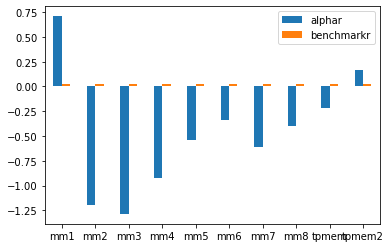

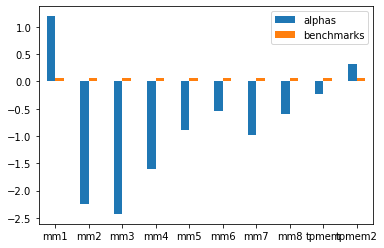

In [32]:
sig=get_signalact2(mi02(stock), idlogrets(stock), delay=1)

In [33]:
#APO - Absolute Price Oscillator
#real = APO(close, fastperiod=12, slowperiod=26, matype=0)
def mi03(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.APO(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, matype=0)
            v=np.nan_to_num(a,0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi03(stock)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.76667958e+01,  2.66448090e+01,  2.43150983e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.46705178e+00,  3.83846166e+00,  3.84342947e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.33531923e+00, -2.43615185e+00, -2.28737005e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.87211452e+00, -9.29038356e+00, -9.46480756e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.67943778e-02,  1.23722125e-02,  8.95516078e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38521781e+00,  1.52120003e+00,  1.50251457e+00]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


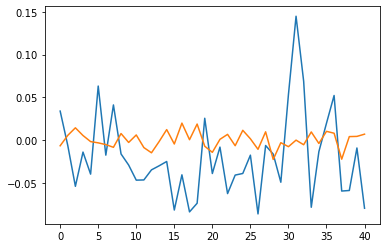

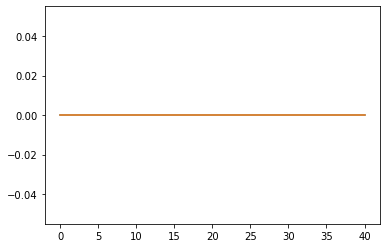

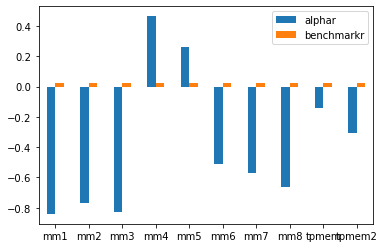

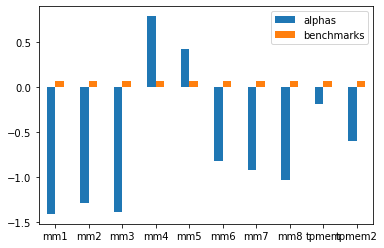

In [34]:
sig=get_signalact2(mi03(stock), idlogrets(stock), delay=1)

In [35]:
#AROON - Aroon
#aroondown, aroonup = AROON(high, low, timeperiod=14)
def mi04(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            up,down=ta.AROON(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            cu=up - down
            ed=np.nan_to_num(cu, 0)
            mi.append(np.asarray(ed))
    return getleneq(mi)[1]

mi04(stock)

array([[  0.        ,   0.        ,   0.        , ..., -92.85714286,
        -85.71428571, -78.57142857],
       [  0.        ,   0.        ,   0.        , ..., -50.        ,
        -42.85714286,  64.28571429],
       [  0.        ,   0.        ,   0.        , ...,  50.        ,
          7.14285714,   7.14285714],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 100.        ,
         85.71428571,  85.71428571],
       [  0.        ,   0.        ,   0.        , ...,  28.57142857,
         50.        ,  50.        ],
       [  0.        ,   0.        ,   0.        , ..., -78.57142857,
        -78.57142857, -78.57142857]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


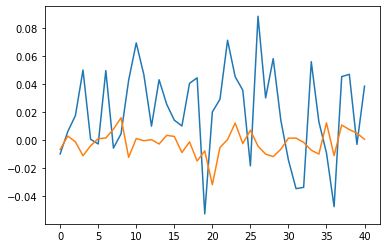

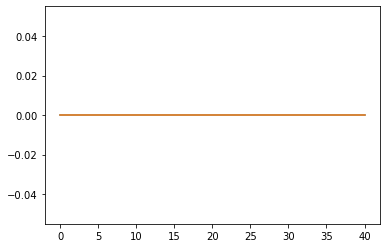

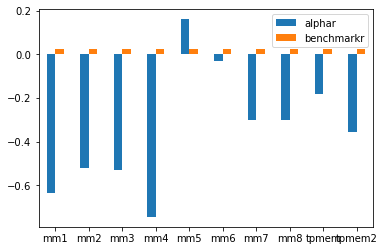

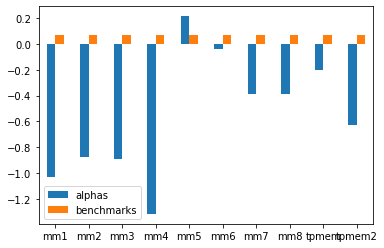

In [36]:
sig=get_signalact2(mi04(stock), idlogrets(stock), delay=1)

In [37]:
# AROONOSC - Aroon Oscillator
# real = AROONOSC(high, low, timeperiod=14)
def mi05(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            f=ta.AROONOSC(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            e=np.nan_to_num(f, 0)
            mi.append(np.asarray(e))
    return getleneq(mi)[1]

mi05(stock)

array([[   0.        ,    0.        ,    0.        , ...,   92.85714286,
          85.71428571,   78.57142857],
       [   0.        ,    0.        ,    0.        , ...,   50.        ,
          42.85714286,  -64.28571429],
       [   0.        ,    0.        ,    0.        , ...,  -50.        ,
          -7.14285714,   -7.14285714],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -100.        ,
         -85.71428571,  -85.71428571],
       [   0.        ,    0.        ,    0.        , ...,  -28.57142857,
         -50.        ,  -50.        ],
       [   0.        ,    0.        ,    0.        , ...,   78.57142857,
          78.57142857,   78.57142857]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


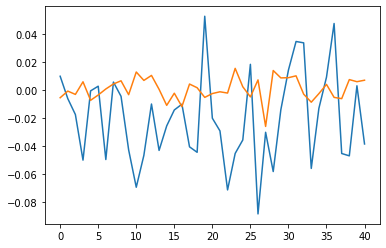

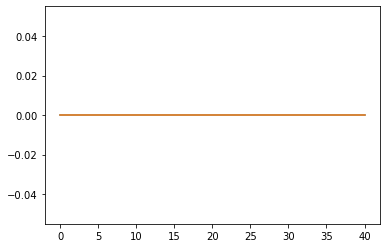

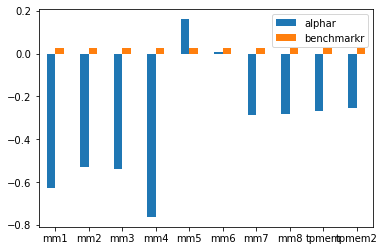

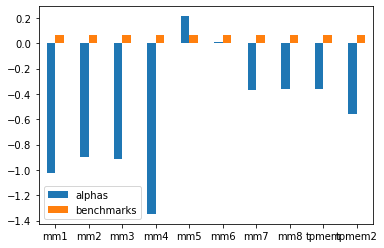

In [38]:
sig=get_signalact2(mi05(stock), idlogrets(stock), delay=1)

In [39]:
#BOP - Balance Of Power
#real = BOP(open, high, low, close)

def mi06(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            g=ta.BOP(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            h=np.nan_to_num(g, 0)
            mi.append(np.asarray(h))
    return getleneq(mi)[1]
mi06(stock)

array([[-0.66463681, -0.5697937 ,  0.04517327, ..., -0.57099814,
        -0.27000598,  0.91780215],
       [-0.45974526, -0.59856819,  0.66883329, ..., -0.22182337,
        -0.45129321, -0.37209925],
       [ 0.46875084, -0.41666468,  0.52173967, ..., -0.17025029,
         0.83517975, -0.18080022],
       ...,
       [ 0.36024945,  0.61458499,  0.65816537, ...,  0.42559061,
         0.26338661,  0.59942703],
       [ 0.30327846,  0.37606779,  0.78909024, ..., -0.21505451,
         0.01499939,  0.29506298],
       [-0.74522553,  0.57365065,  0.48052   , ...,  0.23840946,
        -0.28019313, -0.837066  ]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


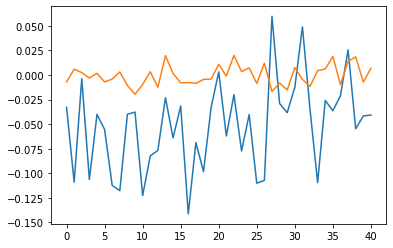

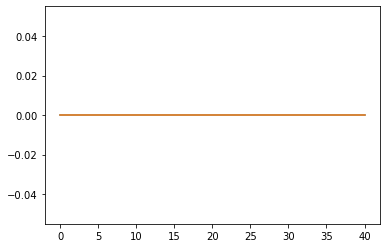

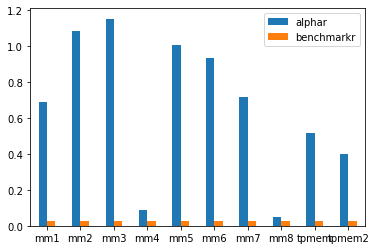

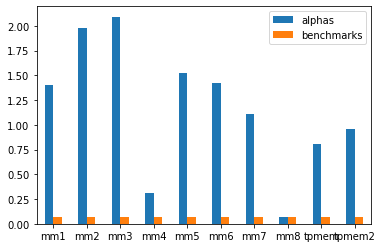

In [40]:
sig=get_signalact2(mi06(stock), idlogrets(stock), delay=1)

In [41]:
# CCI - Commodity Channel Index
# real = CCI(high, low, close, timeperiod=14)
def mi07(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            i=ta.CCI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            j=np.nan_to_num(i, 0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]

mi07(stock)

array([[   0.        ,    0.        ,    0.        , ...,  -43.5622358 ,
        -181.43497495,  -92.32211948],
       [   0.        ,    0.        ,    0.        , ...,   -6.32930183,
        -103.06608398, -120.41310681],
       [   0.        ,    0.        ,    0.        , ...,   -8.05797124,
          37.43976667,   69.06082807],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  -93.1270831 ,
         -77.64145037,  -62.80584149],
       [   0.        ,    0.        ,    0.        , ..., -129.93820943,
        -154.83487826, -108.75425787],
       [   0.        ,    0.        ,    0.        , ...,  128.99960292,
          45.85541234,  -66.63613121]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


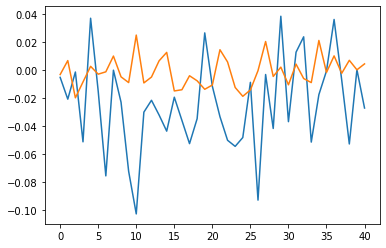

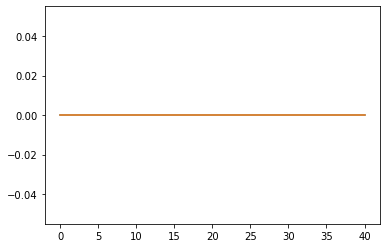

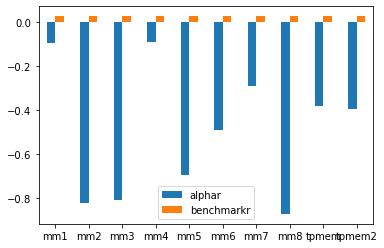

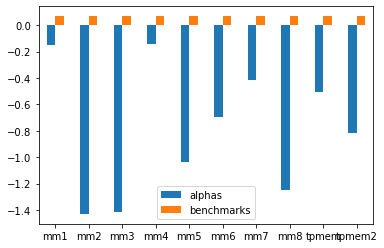

In [42]:
sig=get_signalact2(mi07(stock), idlogrets(stock), delay=1)

In [43]:
# CMO - Chande Momentum Oscillator
# real = CMO(close, timeperiod=14)
def mi08(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            u=ta.CMO(np.asarray(list(data[i]['Close'])), timeperiod=10)
            v=np.nan_to_num(u, 0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi08(stock)

array([[  0.        ,   0.        ,   0.        , ...,  -6.23461241,
        -21.86467036,   2.28070126],
       [  0.        ,   0.        ,   0.        , ...,   4.45553142,
        -13.26072971, -17.23908774],
       [  0.        ,   0.        ,   0.        , ...,  -1.60665239,
          6.62589459,   2.44246568],
       ...,
       [  0.        ,   0.        ,   0.        , ..., -25.13614132,
        -25.88838752, -22.16835029],
       [  0.        ,   0.        ,   0.        , ..., -25.11050741,
        -28.87052161, -22.60865513],
       [  0.        ,   0.        ,   0.        , ...,  28.17848932,
         10.29749938, -13.34994732]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


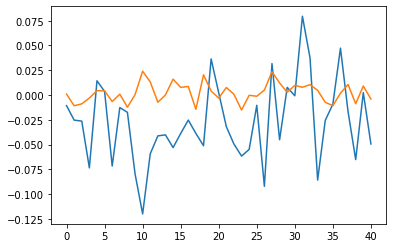

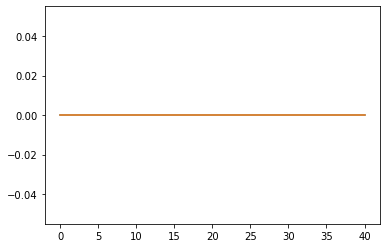

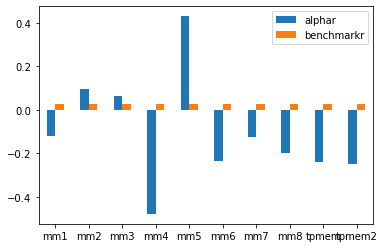

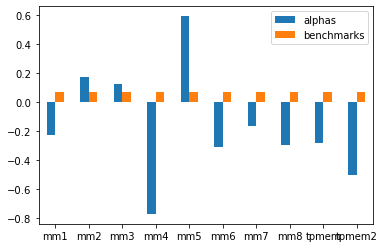

In [44]:
sig=get_signalact2(mi08(stock), idlogrets(stock), delay=1)

In [45]:
#DX - Directional Movement Index
#real = DX(high, low, close, timeperiod=14
def mi09(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            e=ta.DX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            d=np.nan_to_num(e, 0)
            mi.append(np.asarray(d))
    return getleneq(mi)[1]
mi09(stock)

array([[ 0.        ,  0.        ,  0.        , ...,  3.36914762,
        18.77982411,  5.55203857],
       [ 0.        ,  0.        ,  0.        , ...,  6.39591381,
        11.43257262, 13.67812009],
       [ 0.        ,  0.        ,  0.        , ...,  4.28758551,
         0.26076893,  4.95100085],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 36.35153779,
        34.64283634, 31.31280489],
       [ 0.        ,  0.        ,  0.        , ..., 32.55657469,
        38.42515369, 35.60563841],
       [ 0.        ,  0.        ,  0.        , ..., 25.11261285,
        12.26314493,  4.74317931]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


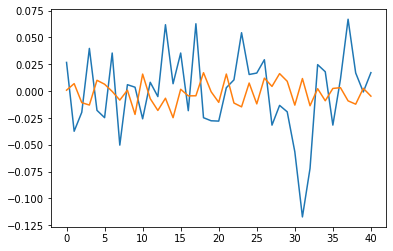

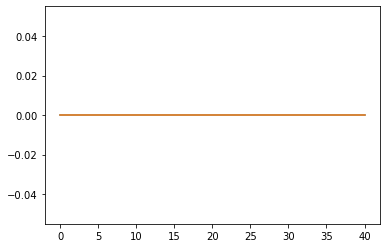

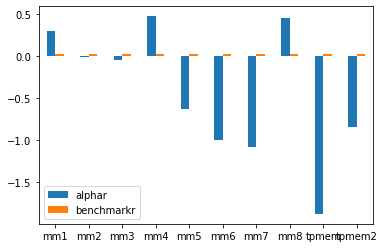

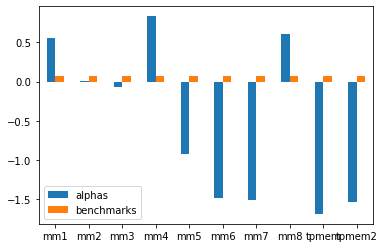

In [46]:
sig=get_signalact2(mi09(stock), idlogrets(stock), delay=1)

In [47]:
# MACD - Moving Average Convergence/Divergence
# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

def mi10(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACD(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, signalperiod=9)
            macd1 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd1))
    return getleneq(mi)[1]
mi10(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 14.70604622,
        10.84867419,  9.88026256],
       [ 0.        ,  0.        ,  0.        , ...,  2.54005455,
         1.95880449,  1.38097224],
       [ 0.        ,  0.        ,  0.        , ...,  0.05391724,
         0.32358772,  0.39078077],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -3.64258876,
        -3.84866082, -3.89445952],
       [ 0.        ,  0.        ,  0.        , ..., -1.09691084,
        -1.29781496, -1.38857659],
       [ 0.        ,  0.        ,  0.        , ...,  0.57648186,
         0.56871977,  0.39182693]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


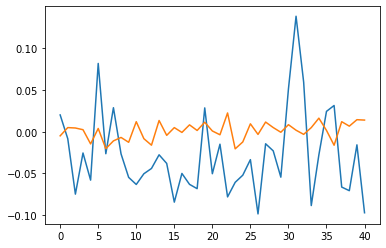

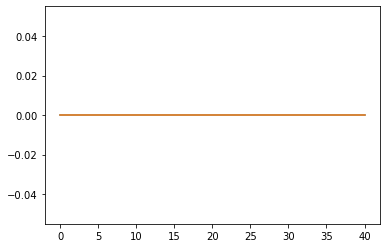

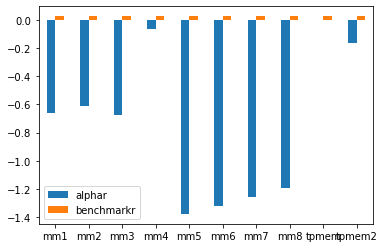

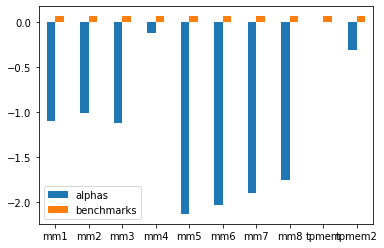

In [48]:
sig=get_signalact2(mi10(stock), idlogrets(stock), delay=1)

In [49]:
# MACDEXT - MACD with controllable MA type
# macd, macdsignal, macdhist = MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
def mi11(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDEXT(np.asarray(list(data[i]['Close'])), fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
            macd2 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd2))
    return getleneq(mi)[1]
mi11(stock)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.76667958e+01,  2.66448090e+01,  2.43150983e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.46705178e+00,  3.83846166e+00,  3.84342947e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.33531923e+00, -2.43615185e+00, -2.28737005e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.87211452e+00, -9.29038356e+00, -9.46480756e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.67943778e-02,  1.23722125e-02,  8.95516078e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38521781e+00,  1.52120003e+00,  1.50251457e+00]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


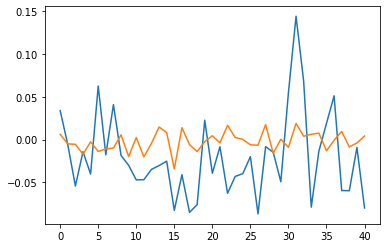

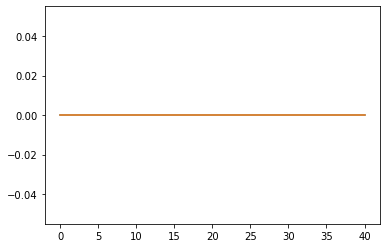

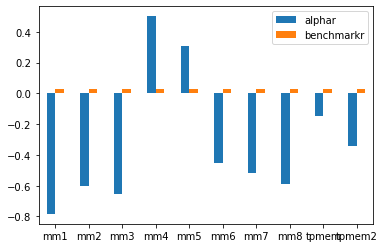

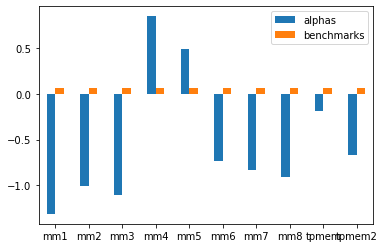

In [50]:
sig=get_signalact2(mi11(stock), idlogrets(stock), delay=1)

In [51]:
# MACDFIX - Moving Average Convergence/Divergence Fix
# macd, macdsignal, macdhist = MACDFIX(close, signalperiod=9)

def mi12(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDFIX(np.asarray(list(data[i]['Close'])), signalperiod=9)
            macd3 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd3))
    return getleneq(mi)[1]
mi12(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 14.03428383,
        10.40748305,  9.48595047],
       [ 0.        ,  0.        ,  0.        , ...,  2.41604282,
         1.86864081,  1.3230984 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.05600592,
         0.30723328,  0.36930368],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -3.44248346,
        -3.64427841, -3.69444202],
       [ 0.        ,  0.        ,  0.        , ..., -1.04354256,
        -1.23261427, -1.31865487],
       [ 0.        ,  0.        ,  0.        , ...,  0.54293906,
         0.53728055,  0.37228732]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


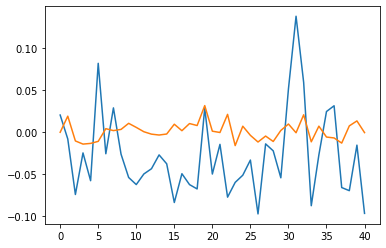

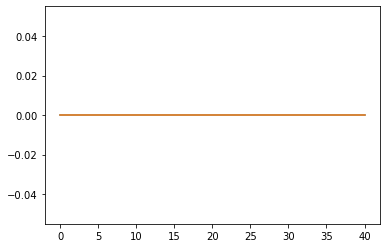

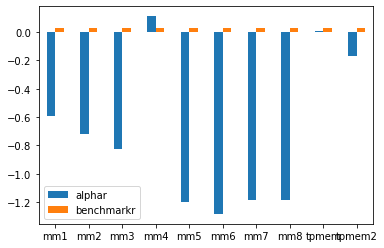

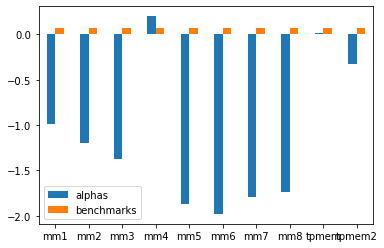

In [52]:
sig=get_signalact2(mi12(stock), idlogrets(stock), delay=1)

In [53]:
# MFI - Money Flow Index
# real = MFI(high, low, close, volume, timeperiod=14)
def mi13(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            s=ta.MFI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), np.asarray((list(data[i]['Volume'])), dtype='f8'), timeperiod=14)
            x=np.nan_to_num(s, 0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]
mi13(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 69.18349012,
        62.03365451, 60.06225589],
       [ 0.        ,  0.        ,  0.        , ..., 60.82725776,
        53.67119518, 47.26763692],
       [ 0.        ,  0.        ,  0.        , ..., 49.53034804,
        50.15035642, 53.07630712],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 23.90217631,
        30.47376127, 27.0154662 ],
       [ 0.        ,  0.        ,  0.        , ..., 52.53870774,
        47.93423593, 47.45896546],
       [ 0.        ,  0.        ,  0.        , ..., 47.34101851,
        46.77392438, 47.9707116 ]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


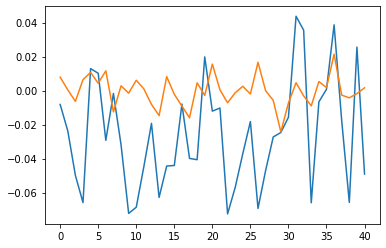

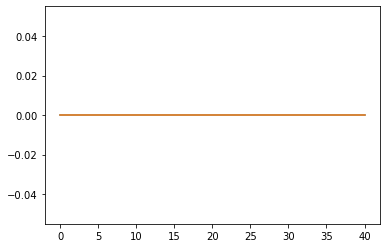

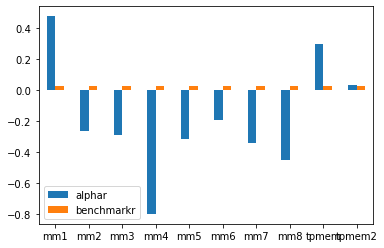

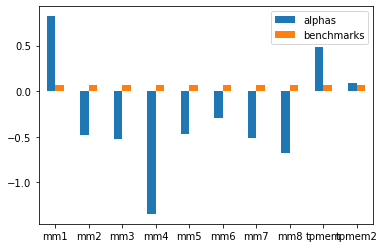

In [54]:
sig=get_signalact2(mi13(stock), idlogrets(stock), delay=1)

In [55]:
# MINUS_DI - Minus Directional Indicator
# real = MINUS_DI(high, low, close, timeperiod=14
def mi14(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            w=ta.MINUS_DI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            k=np.nan_to_num(w, 0)
            mi.append(np.asarray(k))
    return getleneq(mi)[1]
mi14(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 25.60717649,
        31.05371544, 28.37433581],
       [ 0.        ,  0.        ,  0.        , ..., 22.82766657,
        23.18993603, 22.93399348],
       [ 0.        ,  0.        ,  0.        , ..., 25.17769243,
        23.65515659, 22.22484272],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 34.92617333,
        33.3675738 , 31.75911899],
       [ 0.        ,  0.        ,  0.        , ..., 30.23306376,
        32.45856233, 30.9013562 ],
       [ 0.        ,  0.        ,  0.        , ..., 15.98347845,
        18.84966692, 20.19209909]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


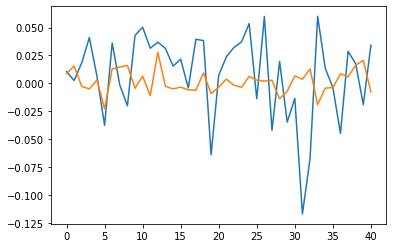

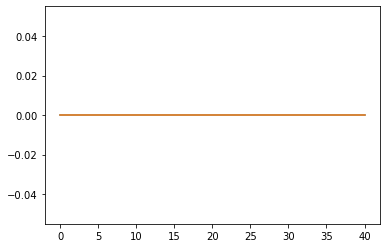

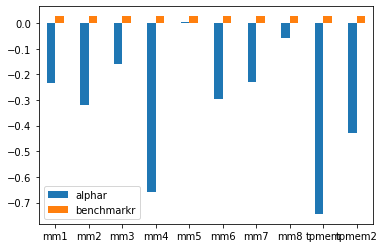

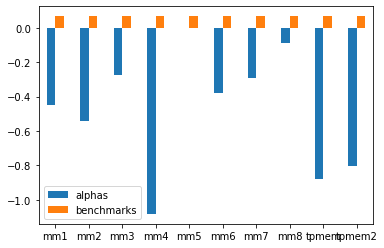

In [56]:
sig=get_signalact2(mi14(stock), idlogrets(stock), delay=1)

In [57]:
# MINUS_DM - Minus Directional Movement
# real = MINUS_DM(high, low, timeperiod=14)
def mi15(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            h=ta.MINUS_DM(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            m=np.nan_to_num(h, 0)
            mi.append(np.asarray(m))
    return getleneq(mi)[1]
mi15(stock)
        

array([[  0.        ,   0.        ,   0.        , ...,  80.84757904,
        102.63274953,  95.30183885],
       [  0.        ,   0.        ,   0.        , ...,  18.73804257,
         19.25961156,  18.71891648],
       [  0.        ,   0.        ,   0.        , ...,  30.41558567,
         28.24304383,  26.22568356],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  37.60460842,
         34.91856496,  32.42438175],
       [  0.        ,   0.        ,   0.        , ...,   9.9604413 ,
         10.57898304,   9.8233414 ],
       [  0.        ,   0.        ,   0.        , ...,   4.01624358,
          4.86936843,   5.26154663]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


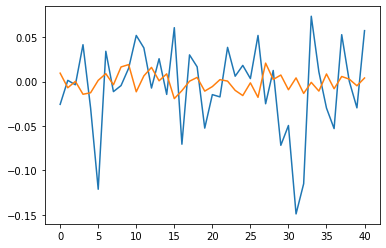

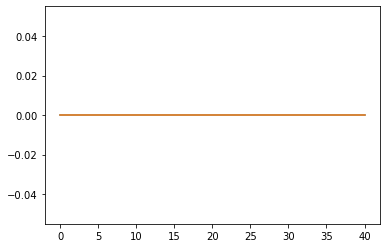

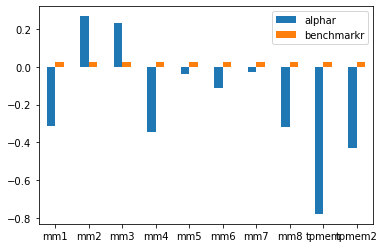

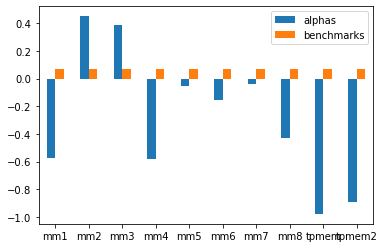

In [58]:
sig=get_signalact2(mi15(stock), idlogrets(stock), delay=1)